In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv("/content/drive/MyDrive/breast_cancer_survival.csv", encoding = 'unicode_escape')

In [14]:
df.head()
#similarly the first 31 rows

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [15]:
#Check if the dataset has null values and specify those columns
df.isnull()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Drop the entire column if the percentage of null values to the total rows is greater than 10%
# If less than 10% then drop the null values directly

# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Drop columns with null percentage greater than 10%
columns_to_drop = null_percentage[null_percentage > 10].index
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [18]:
#Find and eliminate duplicate values if any
df.drop_duplicates()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


Visualizations

In [58]:
#Find the number of patients of each Tumour Stage and visualize it using a pie-chart.
df.value_counts("Tumour_Stage")

Tumour_Stage
II     189
III     81
I       64
dtype: int64

TypeError: ignored

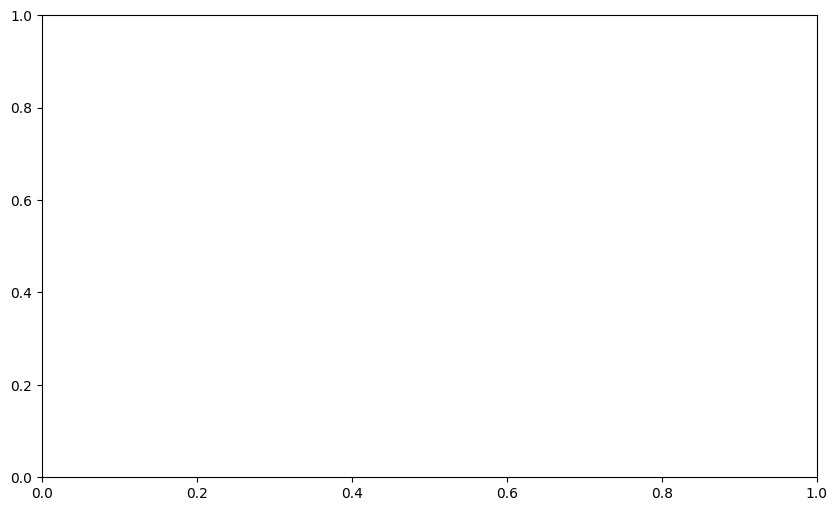

In [57]:
plt.figure(figsize=(10,6))
df['Tumour_Stage'].plot(kind='pie', labels=df['Count'], autopct='%1.1f%%')
plt.title('Tumour Stage Distribution')
plt.show()

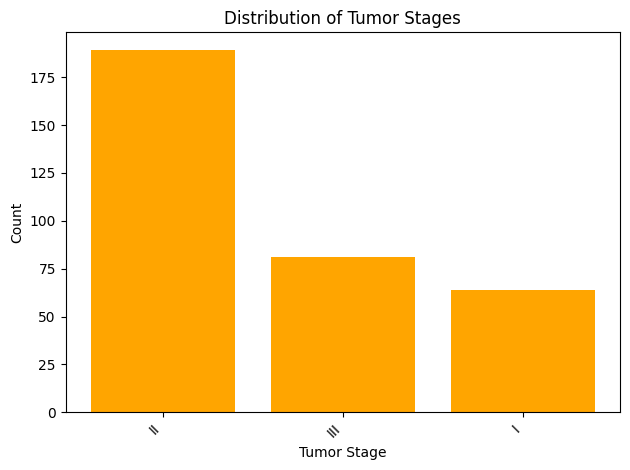

In [51]:
# Make a historgram of counts of people with different Tumor Stages

tumor_stage_counts = df.value_counts("Tumour_Stage")
# Create a histogram using a bar plot
plt.bar(tumor_stage_counts.index, tumor_stage_counts.values, color='orange')

# Add labels and title
plt.xlabel('Tumor Stage')
plt.ylabel('Count')
plt.title('Distribution of Tumor Stages')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
#Rename the Patient_Status as Target and Give labels Alive = 1 and Dead = 0
df.rename(columns = {'Patient_Status':'Target'}, inplace = True)

In [32]:
#Bin the age column
# Create a new column 'age_bins' with the Age values binned as [0, 20, 40, 60, 80, 100]
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Defining the bin edges
bins = [0, 20, 40, 60, 80, 100]

# Defining corresponding labels for the bins
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create the 'age_bins' column using pd.cut()
df['age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

ValueError: ignored

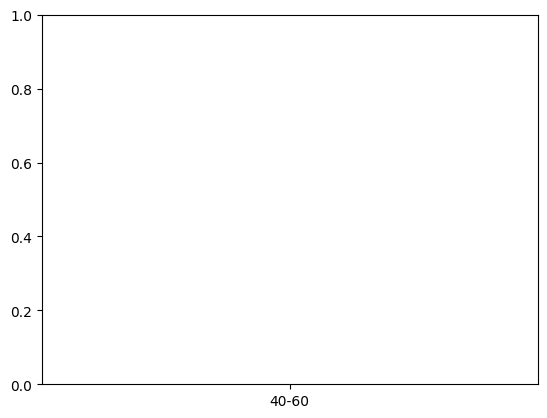

In [35]:
#plot the count of people in each age bin using a histogram
plt.hist(df['age_bins'], bins=labels, edgecolor='black', align='left')

# Add labels and title
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Count of People in Each Age Bin')

# Show the plot
plt.show()

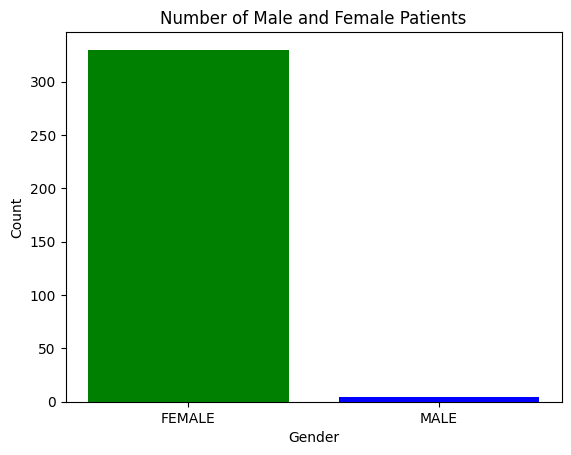

In [41]:
# Make a chart showcasing number of male and female patients in the given data, explain why the data has more values of one gender over the other

# Count the number of occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values, color=['green', 'blue'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Patients')

# Show the plot
plt.show()

In [53]:
# diplay counts of pateints with different breast cancer types (Histology)
df.value_counts("Histology")

Histology
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
dtype: int64

In [52]:
# Find out the most frequent surgery performed
df.groupby(['Surgery_type']).size()

Surgery_type
Lumpectomy                      66
Modified Radical Mastectomy     96
Other                          105
Simple Mastectomy               67
dtype: int64

In [55]:
# Find out prevalent surgery types for each type of breast cancer
df.groupby(['Histology','Surgery_type']).size()

Histology                       Surgery_type               
Infiltrating Ductal Carcinoma   Lumpectomy                     48
                                Modified Radical Mastectomy    64
                                Other                          70
                                Simple Mastectomy              51
Infiltrating Lobular Carcinoma  Lumpectomy                     13
                                Modified Radical Mastectomy    27
                                Other                          35
                                Simple Mastectomy              14
Mucinous Carcinoma              Lumpectomy                      5
                                Modified Radical Mastectomy     5
                                Simple Mastectomy               2
dtype: int64

In [ ]:
# find out the co-relation between age protien levels and the type of breast cancer (make a heatmap)

In [ ]:
# What was your analysis of the entire dataset from the above colab notebook